 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [2]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [3]:
# Reading whale returns
whale_df = pd.read_csv('data/whale_returns.csv')

In [4]:
# Count nulls
whale_df.isnull().sum()


Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv('data/algo_returns.csv')

In [7]:
# Count nulls
algo_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P TSX 60 Closing Prices
snp_df = pd.read_csv('data/sp_tsx_history.csv')


In [10]:
# Check Data Types
snp_df.dtypes

Date     object
Close    object
dtype: object

In [11]:
# Drop nulls
snp_df.dropna(inplace=True)

In [12]:
# Fix Data Types
whale_df['Date'] = pd.to_datetime(whale_df['Date'])
algo_df['Date'] = pd.to_datetime(algo_df['Date'])
snp_df['Date'] = pd.to_datetime(snp_df['Date'])

# Remove $ symbol from snp_df['Close']
snp_df['Close'] = snp_df['Close'].str.replace('$', '')
snp_df['Close'] = snp_df['Close'].str.replace(',', '')

# Convert all columns except Date to float
snp_df[snp_df.columns[1:]] = snp_df[snp_df.columns[1:]].astype(float)
algo_df[algo_df.columns[1:]] = algo_df[algo_df.columns[1:]].astype(float)
whale_df[whale_df.columns[1:]] = whale_df[whale_df.columns[1:]].astype(float)


/tmp/ipykernel_4421/1224098251.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  snp_df['Close'] = snp_df['Close'].str.replace('$', '')


In [13]:
# Calculate Daily Returns
# Add daily returns to snp_df from closing prices
snp_df['SNPTSX'] = snp_df['Close'].pct_change()
snp_df.dropna(inplace=True)

In [14]:
# Rename `Close` Column to be specific to this portfolio.
snp_df.rename(columns={'Close': 'SNPTSX Close'}, inplace=True)

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_df = pd.merge(algo_df, whale_df, on='Date')
portfolio_df = pd.merge(portfolio_df, snp_df, on='Date')

In [16]:
# Reanme columns for utility
portfolio_df.rename(columns={'SOROS FUND MANAGEMENT LLC':'Soros', 'PAULSON & CO.INC. ':'Paulson', 'TIGER GLOBAL MANAGEMENT LLC':'Tiger', 'BERKSHIRE HATHAWAY INC':'Berkshire'}, inplace=True)

# Drop SNPTSX Close Column
portfolio_df.drop(columns=['SNPTSX Close'], inplace=True)
portfolio_df.head()

,Date,Algo 1,Algo 2,Soros,Paulson,Tiger,Berkshire,SNPTSX
0,2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.008530
1,2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.003371
2,2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001344
3,2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.009972
4,2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

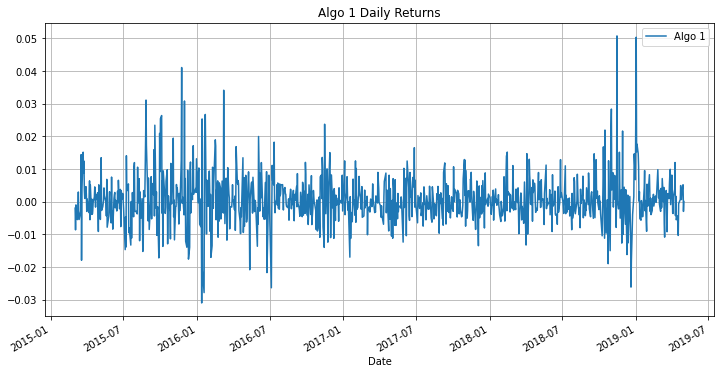

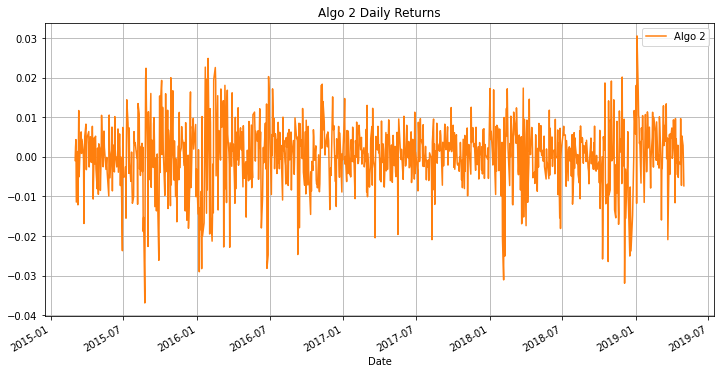

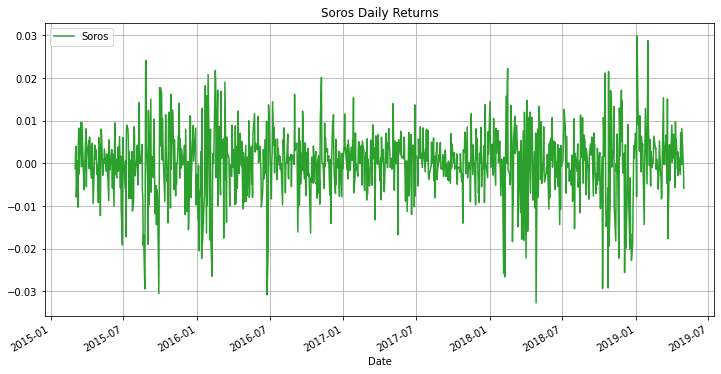

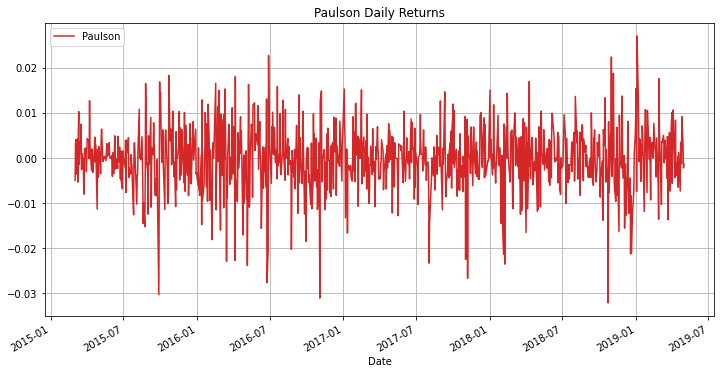

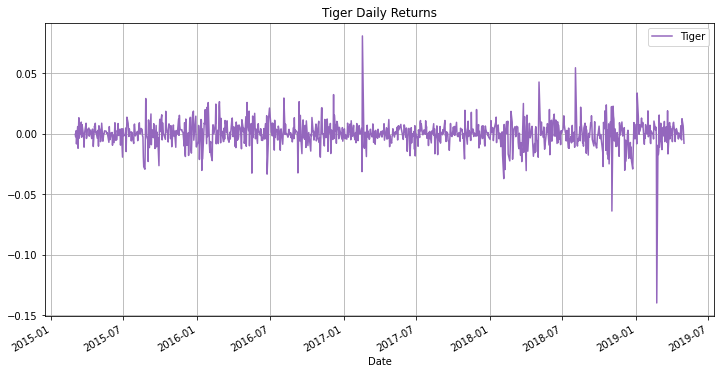

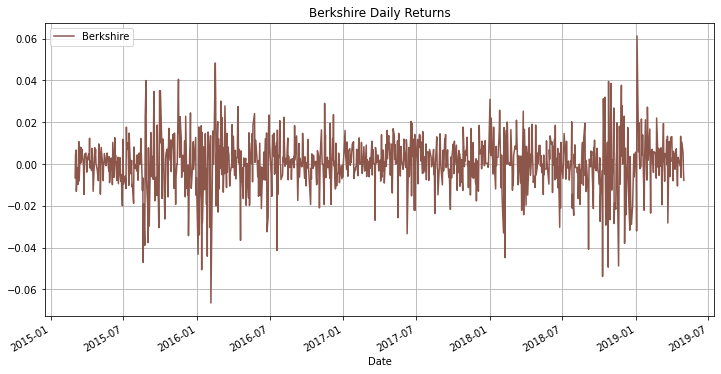

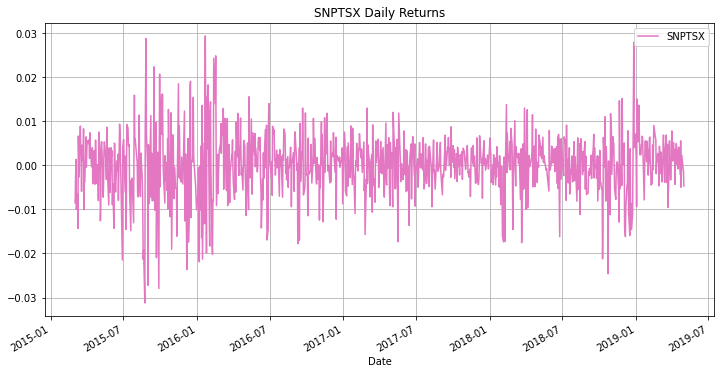

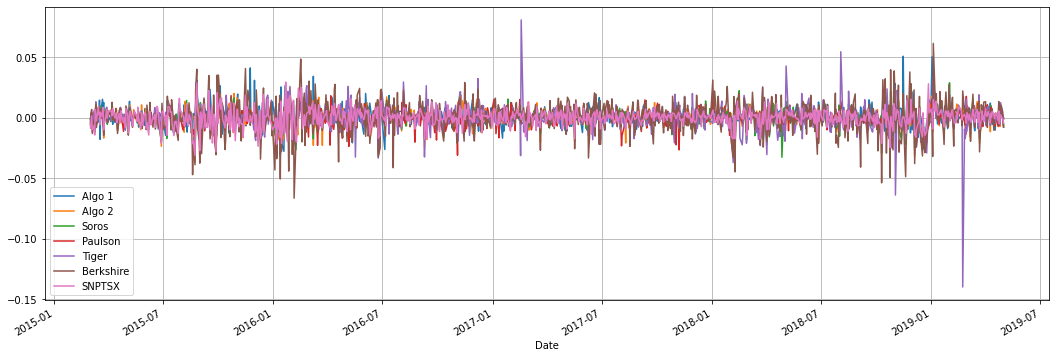

In [17]:
# Plot daily returns of all portfolios
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']

# Individual plots
for col in portfolio_df.columns[1:]:
    portfolio_df.plot(x='Date', y=col, figsize=(12, 6), title=f'{col} Daily Returns', grid=True, color=colors[portfolio_df.columns[1:].get_loc(col)], legend=True)

# Combined plot
portfolio_df.plot(x='Date', y=['Algo 1', 'Algo 2', 'Soros', 'Paulson', 'Tiger', 'Berkshire', 'SNPTSX'], figsize=(18,6), grid=True, color=colors, legend=True)


#### Calculate and Plot cumulative returns.

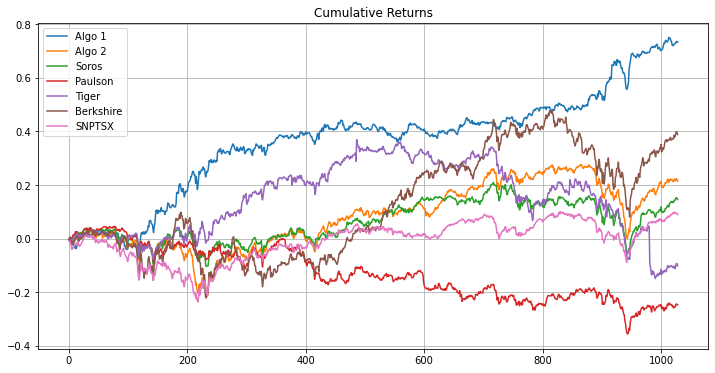

In [18]:
# Calculate cumulative returns of all portfolios and plot
for col in portfolio_df.columns[1:]:
    portfolio_df[col].cumsum().plot(x='Date', figsize=(12, 6), title='Cumulative Returns', grid=True, color=colors[portfolio_df.columns[1:].get_loc(col)], legend=True)

Algo 1, Algo 2, Soros and Berkshire all seem to outperform the S&P returns.

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


/home/abhishek/.pyenv/versions/3.9.0/lib/python3.9/site-packages/numpy/core/_methods.py:179: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


<AxesSubplot:>

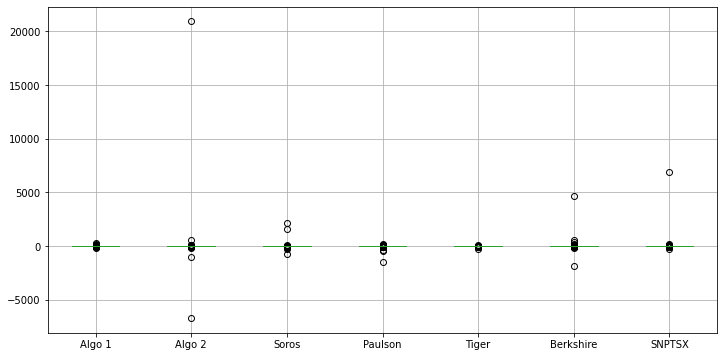

In [19]:
# Box plot to visually show risk
simple_return = portfolio_df.iloc[:, 1:].pct_change(1).dropna()
simple_return.boxplot(figsize=(12,6))

### Calculate Standard Deviations

In [30]:
# Calculate the daily standard deviations of all portfolios
for col in portfolio_df.columns[1:]:
    print(f'Standard Deviation of {col} => {round(portfolio_df[col].std(), 6)}')

Standard Deviation of Algo 1 => 0.007589
Standard Deviation of Algo 2 => 0.008326
Standard Deviation of Soros => 0.007828
Standard Deviation of Paulson => 0.006982
Standard Deviation of Tiger => 0.010883
Standard Deviation of Berkshire => 0.012826
Standard Deviation of SNPTSX => 0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [32]:
# Calculate  the daily standard deviation of S&P TSX 60
snp_std_dev = portfolio_df['SNPTSX'].std()
# Determine which portfolios are riskier than the S&P TSX 60
for col in portfolio_df.columns[1:]:
    if portfolio_df[col].std() > snp_std_dev and col != 'SNPTSX':
        print(f'{col} is riskier than the S&P')

Algo 1 is riskier than the S&P
Algo 2 is riskier than the S&P
Soros is riskier than the S&P
Tiger is riskier than the S&P
Berkshire is riskier than the S&P


### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized standard deviation (252 trading days)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [108]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation


### Calculate and plot the correlation

In [109]:
# Calculate the correlation

# Display de correlation matrix


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [110]:
# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [111]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [112]:
# Annualized Sharpe Ratios


In [113]:
# Visualize the sharpe ratios as a bar plot


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [114]:
# Reading data from 1st stock


In [115]:
# Reading data from 2nd stock


In [116]:
# Reading data from 3rd stock


In [117]:
# Combine all stocks in a single DataFrame


In [118]:
# Reset Date index


In [119]:
# Reorganize portfolio data by having a column per symbol


In [120]:
# Calculate daily returns

# Drop NAs

# Display sample data


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [121]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return

# Display sample data


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [122]:
# Join your returns DataFrame to the original returns DataFrame


In [123]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [124]:
# Calculate the annualized `std`


### Calculate and plot rolling `std` with 21-day window

In [125]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [126]:
# Calculate and plot the correlation


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [127]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [128]:
# Calculate Annualized Sharpe Ratios


In [129]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!